In [1]:
from loadData import loadData
from extract_fiducials import extract_fiducials
from extract_features import extract_features
from preprocess import preprocess
from artifacts import artifacts

import numpy as np

# Load Data

In [2]:
ROOT_PATH = 'C:/Users/user/Desktop/AI-project/train'

In [3]:
ppgs_128, speaks_128, annotations_128, ppgs_250, speaks_250, annotations_250 = loadData(ROOT_PATH)

Loading file: 1/62
Loading file: 2/62
Loading file: 3/62
Loading file: 4/62
Loading file: 5/62
Loading file: 6/62
Loading file: 7/62
Loading file: 8/62
Loading file: 9/62
Loading file: 10/62
Loading file: 11/62
Loading file: 12/62
Loading file: 13/62
Loading file: 14/62
Loading file: 15/62
Loading file: 16/62
Loading file: 17/62
Loading file: 18/62
Loading file: 19/62
Loading file: 20/62
Loading file: 21/62
Loading file: 22/62
Loading file: 23/62
Loading file: 24/62
Loading file: 25/62
Loading file: 26/62
Loading file: 27/62
Loading file: 28/62
Loading file: 29/62
Loading file: 30/62
Loading file: 31/62
Loading file: 32/62
Loading file: 33/62
Loading file: 34/62
Loading file: 35/62
Loading file: 36/62
Loading file: 37/62
Loading file: 38/62
Loading file: 39/62
Loading file: 40/62
Loading file: 41/62
Loading file: 42/62
Loading file: 43/62
Loading file: 44/62
Loading file: 45/62
Loading file: 46/62
Loading file: 47/62
Loading file: 48/62
Loading file: 49/62
Loading file: 50/62
Loading f

# Pre-processing

In [4]:
for i in range(len(ppgs_128)):
    ppgs_128[i] = preprocess(ppgs_128[i],128)

In [5]:
for i in range(len(ppgs_250)):
    ppgs_250[i] = preprocess(ppgs_250[i],250)

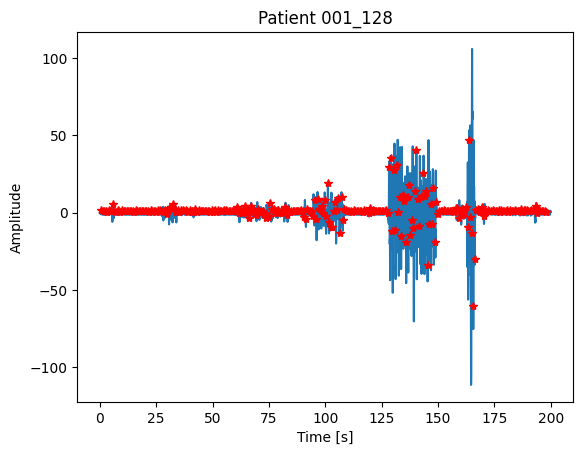

In [6]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots()
axs.set_title("Patient 001_128")
fs=128
t = np.arange(0, ppgs_128[0].shape[0]/fs, 1/fs)
axs.plot(t[0:200*128], ppgs_128[0][0:200*128], color='C0')
axs.plot((speaks_128[0][0:300])/128, ppgs_128[0][speaks_128[0][0:300]],'*', color='r')
axs.set_xlabel("Time [s]")
axs.set_ylabel("Amplitude")
plt.show()

## Artifacts removal

In [7]:
n_speaks_128=list()
n_annotations_128=list()

for i in range(len(speaks_128)):
    speaks, annotations = artifacts(speaks_128[i],ppgs_128[i],annotations_128[i])
    n_speaks_128.append(speaks)
    n_annotations_128.append(annotations)


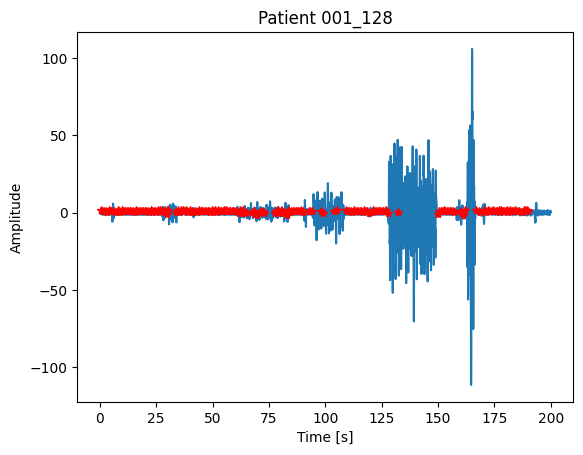

In [8]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots()
axs.set_title("Patient 001_128")
fs=128
t = np.arange(0, ppgs_128[0].shape[0]/fs, 1/fs)
axs.plot(t[0:200*128], ppgs_128[0][0:200*128], color='C0')
axs.plot((n_speaks_128[0][0:200])/128, ppgs_128[0][n_speaks_128[0][0:200]],'*', color='r')
axs.set_xlabel("Time [s]")
axs.set_ylabel("Amplitude")
plt.show()



In [9]:
n_speaks_250=list()
n_annotations_250=list()

for i in range(len(speaks_250)):
    speaks, annotations = artifacts(speaks_250[i],ppgs_250[i],annotations_250[i])
    n_speaks_250.append(speaks)
    n_annotations_250.append(annotations)
    

# Extract fiducials

In [10]:
n_speaks_128[0]

array([    83,    165,    247, ..., 229896, 229984, 230050])

In [11]:
speaks_128[2]

array([[   107],
       [   215],
       [   321],
       ...,
       [229805],
       [229929],
       [230048]])

In [12]:
fiducials_128 = list()

for i in range(len(ppgs_128)):
    print(i)
    fiducials_128.append(extract_fiducials(ppgs_128[i], n_speaks_128[i],128))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61


In [13]:
fiducials_250 = list()

for i in range(len(ppgs_250)):
   print(i)
   fiducials_250.append(extract_fiducials(ppgs_250[i], n_speaks_250[i],250))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42


# Extract features

In [14]:
on1=fiducials_128[1].loc[1]['onset'].astype(int)
on2=fiducials_128[1].loc[1+1]['onset'].astype(int)
print(on1)
print(on2)
print(ppgs_128[1])
sig=ppgs_128[1]

type(on1)
print(sig[on1:on2])

265
665
[-0.1361797  -0.14170437 -0.14732343 ... -0.51503075 -0.41937709
 -0.3148497 ]
[-1.2104406  -1.2137822  -1.19627919 -1.15306035 -1.07988642 -0.97377534
 -0.8335625  -0.66028152 -0.45727721 -0.23001154  0.01441809  0.26797528
  0.52248616  0.77042199  1.00554691  1.22333956  1.42113218  1.59794926
  1.75406333  1.89031696  2.00728509  2.1043729   2.17896267  2.22574121
  2.2363573   2.19957621  2.10210813  1.93026825  1.67257926  1.32339362
  0.88756987  0.38609031 -0.14166623 -0.64735476 -1.09101175 -1.45019269
 -1.71723848 -1.89409968 -1.98931627 -2.01580475 -1.98851412 -1.92258155
 -1.83242956 -1.73132241 -1.63073369 -1.53952326 -1.46388119 -1.40812005
 -1.37468435 -1.36300866 -1.36885609 -1.38476581 -1.40073234 -1.40509364
 -1.38673433 -1.33825018 -1.25801449 -1.15022989 -1.02320271 -0.8862289
 -0.74678668 -0.60947264 -0.47600547 -0.3458118  -0.21748642 -0.09008666
  0.036829    0.16361435  0.29097489  0.42081948  0.55577893  0.69579074
  0.83470641  0.96138601  1.06502306  

In [15]:
features_128 = list()

for i in range(len(fiducials_128)):
    features_128.append(extract_features(fiducials_128[i], ppgs_128[i], 128))

C:\Users\user\Desktop\AI-project\extract_features.py:103: RuntimeWarning: invalid value encountered in cast
  val = pos_trapz(filtered_ppg[df_features.loc[i]['onset'].astype(int):df_features.loc[i+1]['onset'].astype(int)])
C:\Users\user\Desktop\AI-project\extract_features.py:103: RuntimeWarning: invalid value encountered in cast
  val = pos_trapz(filtered_ppg[df_features.loc[i]['onset'].astype(int):df_features.loc[i+1]['onset'].astype(int)])
C:\Users\user\Desktop\AI-project\extract_features.py:103: RuntimeWarning: invalid value encountered in cast
  val = pos_trapz(filtered_ppg[df_features.loc[i]['onset'].astype(int):df_features.loc[i+1]['onset'].astype(int)])
C:\Users\user\Desktop\AI-project\extract_features.py:103: RuntimeWarning: invalid value encountered in cast
  val = pos_trapz(filtered_ppg[df_features.loc[i]['onset'].astype(int):df_features.loc[i+1]['onset'].astype(int)])
C:\Users\user\Desktop\AI-project\extract_features.py:103: RuntimeWarning: invalid value encountered in cast


In [16]:
features_250 = list()

for i in range(len(fiducials_250)):
    features_250.append(extract_features(fiducials_250[i], ppgs_250[i], 250))

C:\Users\user\Desktop\AI-project\extract_features.py:103: RuntimeWarning: invalid value encountered in cast
  val = pos_trapz(filtered_ppg[df_features.loc[i]['onset'].astype(int):df_features.loc[i+1]['onset'].astype(int)])
C:\Users\user\Desktop\AI-project\extract_features.py:103: RuntimeWarning: invalid value encountered in cast
  val = pos_trapz(filtered_ppg[df_features.loc[i]['onset'].astype(int):df_features.loc[i+1]['onset'].astype(int)])
C:\Users\user\Desktop\AI-project\extract_features.py:103: RuntimeWarning: invalid value encountered in cast
  val = pos_trapz(filtered_ppg[df_features.loc[i]['onset'].astype(int):df_features.loc[i+1]['onset'].astype(int)])
C:\Users\user\Desktop\AI-project\extract_features.py:103: RuntimeWarning: invalid value encountered in cast
  val = pos_trapz(filtered_ppg[df_features.loc[i]['onset'].astype(int):df_features.loc[i+1]['onset'].astype(int)])
C:\Users\user\Desktop\AI-project\extract_features.py:103: RuntimeWarning: invalid value encountered in cast


# Add annotation to peaks

In [17]:
for i in range(len(features_128)):
    features_128[i]['annotation'] = n_annotations_128[i]

In [18]:
for i in range(len(features_250)):
    features_250[i]['annotation'] = n_annotations_250[i]

# Remove rows with null values

In [19]:
for i in range(len(features_128)):
    # Find rows with at least one NaN value using np.isnan()
    rows_with_nan = features_128[i][features_128[i].applymap(lambda x: np.isnan(x) if isinstance(x, (float, np.float64)) else False).any(axis=1)]

    # Remove rows with NaN values
    features_128[i] = features_128[i].drop(rows_with_nan.index)

C:\Users\user\AppData\Local\Temp\ipykernel_10412\510882841.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rows_with_nan = features_128[i][features_128[i].applymap(lambda x: np.isnan(x) if isinstance(x, (float, np.float64)) else False).any(axis=1)]
C:\Users\user\AppData\Local\Temp\ipykernel_10412\510882841.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rows_with_nan = features_128[i][features_128[i].applymap(lambda x: np.isnan(x) if isinstance(x, (float, np.float64)) else False).any(axis=1)]
C:\Users\user\AppData\Local\Temp\ipykernel_10412\510882841.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rows_with_nan = features_128[i][features_128[i].applymap(lambda x: np.isnan(x) if isinstance(x, (float, np.float64)) else False).any(axis=1)]
C:\Users\user\AppData\Local\Temp\ipykernel_10412\510882841.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use Dat

In [20]:
for i in range(len(features_250)):
    # Find rows with at least one NaN value using np.isnan()
    rows_with_nan = features_250[i][features_250[i].applymap(lambda x: np.isnan(x) if isinstance(x, (float, np.float64)) else False).any(axis=1)]

    # Remove rows with NaN values
    features_250[i] = features_250[i].drop(rows_with_nan.index)

C:\Users\user\AppData\Local\Temp\ipykernel_10412\3240610789.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rows_with_nan = features_250[i][features_250[i].applymap(lambda x: np.isnan(x) if isinstance(x, (float, np.float64)) else False).any(axis=1)]
C:\Users\user\AppData\Local\Temp\ipykernel_10412\3240610789.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rows_with_nan = features_250[i][features_250[i].applymap(lambda x: np.isnan(x) if isinstance(x, (float, np.float64)) else False).any(axis=1)]
C:\Users\user\AppData\Local\Temp\ipykernel_10412\3240610789.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rows_with_nan = features_250[i][features_250[i].applymap(lambda x: np.isnan(x) if isinstance(x, (float, np.float64)) else False).any(axis=1)]
C:\Users\user\AppData\Local\Temp\ipykernel_10412\3240610789.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use

In [24]:
sum=0
for i in range(len(features_128)):
    sum = sum + len(features_128[i])

for i in range(len(features_250)):
    sum = sum + len(features_250[i])
    
sum

174429

# Write features to csv

In [21]:
i = 0
for feature in features_128:
    file_name = f"C:/Users/cricr/PycharmProjects/AI-project/features/128/features_{i}_128.csv"
    feature.to_csv(file_name, sep=',', index=False, encoding='utf-8')
    i = i + 1

OSError: Cannot save file into a non-existent directory: 'C:\Users\cricr\PycharmProjects\AI-project\features\128'

In [ ]:
i = 0
for feature in features_250:
    file_name = f"C:/Users/cricr/PycharmProjects/AI-project/features/250/features_{i}_250.csv"
    feature.to_csv(file_name, sep=',', index=False, encoding='utf-8')
    i = i + 1